<a href="https://colab.research.google.com/github/jdayllon/ai-saturdays-deeplearning/blob/main/W4_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning - Week 4 - Exercise**


**Neural Networks: Training**
- Cost function
- Gradient descent
- Backpropagation
- Overfitting
- Training


# **Objective**

Designing and training an artificial neural network is not an easy task and there are no shortcuts. The design requires a balanced mix between network architecture, layer functionality, intuition and experience.

The whole process has to be performed with a lot of patience and sometimes the results only confirm that a new point of view has to be applied, with modifications on the network architecture, the layer functionality or the type of nodes of the network.

The main goal of this week is to build a complex neural network capable of solving a real challenge.



# **Calculations**
Building a simple neural network with one perceptron can be an easy task if this has a defined problem to solve and the weights are set manually. But this has, most of the time, few applications on real problems to be solved.

With the same network architecture, the complexity is higher just by using the feed forward technique which implies the calculation of the adjusted weights of the node in each epoch.

When the network started to grow in input data as well as hidden layers, the complexity for the calculation was increased a lot. In a simple neural network of 4 inputs, 4 nodes in a hidden layer and only 1 exit, this is a 4x4x1 network, there are 16 connections between the input layer and the hidden layer, and 4 connections from the hidden layer to the output layer. A total of 20 connections and 5 nodes, that requires 20 weight adjusting and 5 nodes evaluation by means of the summatory of inputs and the activation function.

The network itself was designed hardcoded for a specific architecture and all the calculations have to be carefully configured and tested to avoid any problem like getting the wrong weight or the confusion of a node with another.

A model with an architecture of 1000x100x1, which is not a hard configuration, has a total 100,100 connections and 101 nodes to calculate on each epoch.

||![](http://keras.dhpit.com/img/nn.png)||
---|---|---


Numbers start to grow and to make a simple mistake can be hard to find, affecting the performance of the whole neural network.

Another disadvantage is about changing the neural network architecture, which needs to modify the code for all the calculations.

This was a bottleneck for years, because developers were focused on avoiding mistakes or errors on the neural network instead of finding the best performing architectures.

Everything changed with Keras.



# **Keras**

Keras was created to be user friendly, modular, and easy to extend. The scikit-learn type API follows best practices for reducing cognitive load.

Neural layers, cost functions, optimizers, initialization schemes, activation functions, and regularization schemes are all standalone modules that can be combined to create new models.

Beyond ease of learning and ease of model building, Keras offers the advantages of broad adoption, support for a wide range of production deployment options, integration with some of the major back-end engines and strong support for multiple GPUs and distributed training.

Keras can be used to quickly build neural networks without worrying about the mathematical aspects of tensor algebra, numerical techniques, and optimization methods. 


# **TensorFlow and Keras**

TensorFlow can be seen as an infrastructure layer for differentiable programming, combining the efficiency of executing low-level tensor operations on CPU, GPU, or TPU, with a huge scalability.

Keras is the high-level API of TensorFlow with an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

Using Keras and TensorFlow is a good way to take full advantage of the scalability and cross-platform capabilities of TensorFlow where, for example, a neural network architecture build with Keras can be run on TPU or on large clusters of GPUs, and then exported the Keras model to be run in the browser or on a mobile device.


# **Number Recognition**

One of the first uses of Deep Learning was to read postal codes on mail, a task done by Yann LeCun only 3 years after Rina Dechter introduced the term Deep Learning in 1986. The training took 3 days and the algorithm worked satisfactorily.

The data used was named the MNIST database (Modified National Institute of Standards and Technology database), which is a large database of handwritten digits.

Half of the dataset was taken from American Census Bureau employees, while the other half was taken from American high school students, for a total 70,000 images of approximately 250 different writers.

The train dataset has 60,000 images and the test dataset 10,000. The images were first normalized to 20x20 pixels and then centered on a 28x28 image which resulted in a bounding box.

The dataset can be found on [the MNIST dataset](http://yann.lecun.com/exdb/mnist/).


## Dataset

Like any other Python project, the first step is to import the libraries to be used.


In [1]:
# Import libraries

import tensorflow as tf
import matplotlib.pyplot as plt


Once imported Tensorflow as `tf`, the Keras library is available inside Tensorflow and it isn't necessary to import it as a separate library.

Furthermore, the MNIST dataset is already provided by the Keras library in the standalone version and also in the integrated library from Tensorflow.

The MNIST database is ready to use, splitted on train and test dataset and with different groups for features (x) and labels (y).


In [2]:
# Load MNIST database

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


## EDA

After loading the data is highly recommended to perform an exploratory data analysis (EDA) to verify that all the data is ready to be used in the desired way.

Some basic exploration involves checking the shape of the different datasets and viewing some data to verify the structure and data types.


In [3]:
print('Data Shape')
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)
print('')

print('View data')
print(x_train[0,:10,:10])
print('y_train[0]:', y_train[0])
print('y_train max:', y_train.max())


Data Shape
x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)

View data
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36]
 [  0   0   0   0   0   0   0  49 238 253]
 [  0   0   0   0   0   0   0  18 219 253]
 [  0   0   0   0   0   0   0   0  80 156]]
y_train[0]: 5
y_train max: 9


From the shapes of the datasets can be concluded that the dimensions are consistent between the features and label for training datasets and for testing datasets. In both cases, on the training dataset and the testing dataset, the 1st dimension of the features and the label is the same.

The features for both training and test datasets has 2nd and 3rd dimension of (28,28) which is the expected image size according to the previous information from the MNIST database homepage.

But also at this point something wrong can be detected in the image data, when a part of the `0` image is shown. A part of the image is `0` as expected but then some integer numbers greater than 1 are printed.

It is important to remember that the inputs of a neural network needs to have floating point values from 0 to 1, which implies that this data has to be verified and normalized.

Finally, the label corresponding to the index `0` of the train dataset is printed in the correct way, and the maximum value of the labels is `9` which also corresponds with the specified in the description of the MNIST database, this is numbers form 0 to 9.

Back on the image data, a fast search for the maximum value can give a better view of the situation about incompatible values to be fed on a neural network.


In [4]:
# Check maximum values

print(x_train[0].max())


255


The result of `255` makes all the sense. In image processing it is usual to work with values from 0 to 255 to represent levels of colors, in this case levels from black to white or grayscale.

All the data in the feature datasets needs to be converted to values from 0 to 1, instead values from 0 to 255.



In [5]:
# Correcting features

x_train = x_train / 255.0
x_test = x_test / 255.0


A simple visualization of the image corresponding to the 1rst feature can be done by using the Matplotlib library, which has very useful functions to do it in a simple way.


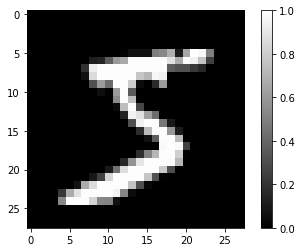

In [6]:
# View the 1st image

plt.imshow(x_train[0], cmap=plt.cm.gray)
plt.colorbar()


For this image the grayscale colormap from `matplotlib` was used, named `plt.cm.gray`. From here on, the binary `plt.cm.binary` colormap will be used for easy visualization.

The next step will show the first 25 images from the dataset, to have a better understanding of the data to work with.


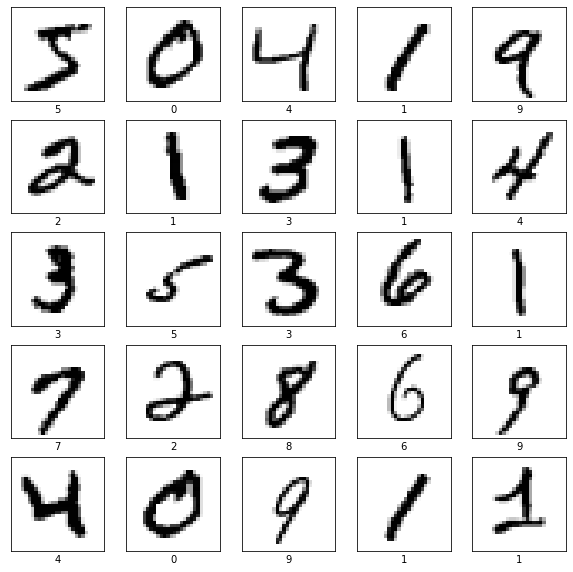

In [7]:
# Show the 1st 25 images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


## Creating the Neural Network

Neural network algorithms are stochastic. This means they make use of randomness, such as initializing to random weights, and in turn the same network trained on the same data can produce different results. The random initialization allows the network to learn a good approximation for the function being learned.

During development of a model, sometimes it is useful to be able to obtain reproducible results from run to run in order to determine if a change in performance is due to an actual model or data modification, or merely a result of a new random seed.

Random numbers are generated using a pseudo-random number generator. A random number generator is a mathematical function that will generate a long sequence of numbers that are random enough for general purpose use, such as in deep learning algorithms.

Random number generators require a seed to kick off the process, and it is common to use the current time in milliseconds as the default in most implementations. This is to ensure different sequences of random numbers are generated each time the code is run, by default.

This seed can also be specified with a specific number, such as `1`, to ensure that the same sequence of random numbers is generated each time the code is run.

The Keras library is integrated with Tensorflow and this has its own random number generator. In the case that Numpy is used, this also has its own random number generator. Additionally, Python also has its own one, but is rarely used.

By initializing both Numpy and Tensorflow random generators is enough in most of the cases.

For this example Numpy isn’t imported as a library and the corresponding code is commented out just for having a reference on the way to do this task.

On the other hand, some internal structures are created by the Keras library itself and it is a good idea to clear them all before creating a new model.

Keras manages a global state, which it uses to implement the Functional model-building API and to uniquify autogenerated layer names.

This global state will consume an increasing amount of memory over time, and is recommendable to clear it. This helps avoid clutter from old models and layers, especially when memory is limited.



In [8]:
# Initialize random number generator

sd = 1
#np.random.seed(sd) # Not used in this example
tf.random.set_seed(sd)


# Clear Keras global state

tf.keras.backend.clear_session()


The Keras API is plenty of information about its many functions and options, which can be consulted on the [Keras website](https://keras.io/api/).

For this example a group of layers will be created with an architecture of 128x0.2dropx10. These values were obtained from previous testing and experience.

The first step on the creation of the model is to use the `Sequential` class to create a group of layers.

The 1st layer to create is for the input layer. In this example the features to be fed to the model are squared images of 28x28 pixels, but the input layer of the neural network is designed to work with only one dimension. To convert from the squared stored images to a one dimensional tensor the layer is defined as `Flatten` indicating the shape of the image. This layer will convert automatically the data from the images to a one dimensional data and fed into the layer.

The 2nd layer is defined as a `Dense` layer which is just a regular densely-connected neural network layer. A method associated with this type of layer is the activation function which varies according to the specific layer requirements. For this layer, the ReLU activation function is used.

||![](https://www.researchgate.net/profile/Hossam-H-Sultan/publication/333411007/figure/fig7/AS:766785846525952@1559827400204/ReLU-activation-function.png)||
---|---|---

The next layer is a `Dropout` layer, which randomly sets input units to 0 with a specific frequency during training time, which helps prevent overfitting. In this case `0.2` represents the 20% of the input of this specific layer and not the input layer itself.

The last layer is for the output and is defined as another `Dense` layer matching the 10 values of the labels. For this layer a Softmax activation function is used.

||![](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac.webp)||
---|---|---





In [9]:
# Define neural network architecture

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


Keras implement a method to visualize the model architecture with a detail of the number of nodes on each layer (Output shape) and the number of connections with the previous layer (Param #).


In [10]:
# View model summary

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


For this example, the model has to perform 101,700 weight adjustments and 1050 node calculations with the corresponding activation function, each epoch.

Once the neural network is defined the next step is to build it with the `compile` method. With it, some parameters have to be defined as the optimizer, which in this case is `adam`.

Another parameter is the loss function with choices from the `tf.keras.losses.Loss` options and the better one for this kind of output is `SparseCategoricalCrossentropy` that works well with labels as integers.

The last parameter is about metrics, a function that is used to judge the performance of the model, and the used is `accuracy` that calculates how often predictions equal labels.


In [11]:
# Create the network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Training

In Deep Learning a new parameter is added to define the quantity of epochs to use to train the neural network. In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset, that is when an entire dataset is passed forward and backward through the neural network exactly one time. Usually, training a neural network takes more than a few epochs.




In [12]:
# Model Training

model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2924 - accuracy: 0.9147
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1409 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1063 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0889 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9771


## Evaluation

Keras also provides a method to evaluate the model using the test dataset, predicting the labels for the test features and comparing them with the real test labels, returning the loss value and metrics values for the model.


In [13]:
# Model evaluation

model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0784 - accuracy: 0.9768 - 539ms/epoch - 2ms/step


[0.07837832719087601, 0.9768000245094299]

The neural network has been trained over and over, epoch over epoch, in order to set the correct values for the weights. When a new image is given to the neural network, all the calculations come from the inputs to the outputs, where there are 10 outputs, one for each possible label. Each output can get a value from 0 to 1 that is a representation of the weight of that output over the rest, what can be seen as the possibility of each output from being the correct one.

In fact, the prediction performed over the model retrieves a tensor with all the output values and then the correct one is selected from the output with the highest value.

This is done in the next step.


In [14]:
# Retieving probabilities

probs = model.predict(x_test)
preds = probs.argmax(axis=1)

print('probs[0]:', probs[0])
print('preds[0]:', preds[0])



probs[0]: [3.4005716e-09 5.3308813e-10 1.9703178e-07 4.9983602e-05 3.8243497e-13
 2.2373209e-08 1.0100929e-16 9.9994910e-01 7.3305284e-10 7.1901047e-07]
preds[0]: 7


In this case, for the 1st value predicted, the output number 7 has the highest value on the tensor (array) corresponding to the outputs, then the selected value for this prediction is `7`.

For a quick check, the image corresponding to the 1st test value is shown.


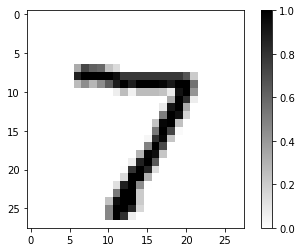

In [15]:
# Show the 1st image from test dataset

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.colorbar()


It seems that the neural network has done a great job!

As done for the training dataset, now it is the time for the test dataset to show the 1st 25 images with the predicted label and the probability related with that value, against the real test label.

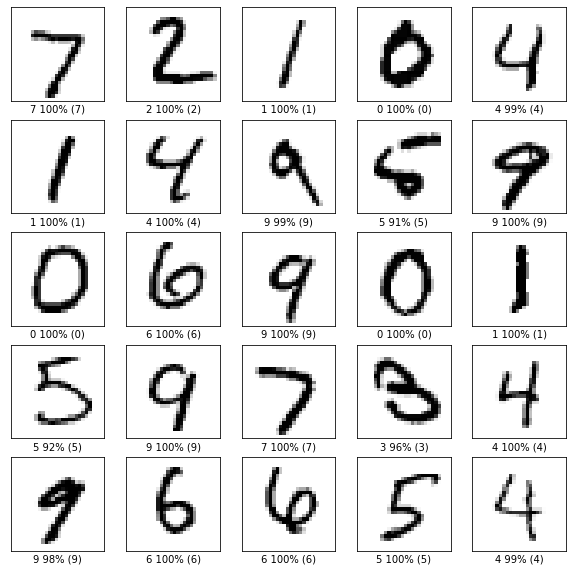

In [16]:
# Show the 1st 25 images from the test dataset

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(preds[i],
                            100*probs[i].max(),
                            y_test[i]))

plt.show()


With a broad view it can be seen that the neural network wasn’t all the time 100% confident with the result but in some cases have had several doubts about the value predicted and, in some cases, it missed.

The next cell provides a slider to move over the 1st 25 test images and also view the probability for each output, this is the probability for each label. The scale of the probability plot is logarithmic to easily show small and big values, but in most cases the real (lineal) difference is quite important.


In [17]:
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=24, description="Image index")

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(x_test[i], cmap=plt.cm.binary)
    ax1.set_xlabel("{} {:2.0f}% ({})".format(preds[i],
                            100*probs[i].max(),
                            y_test[i]))
    ax2.bar(x=range(10), height=probs[i]*100)
    ax2.set_yscale('log')
    plt.xticks(rotation=90)
    

interactive(children=(IntSlider(value=0, description='Image index', max=24), Output()), _dom_classes=('widget-…

# **Exercise**

Horses or Humans?

This is the question done by Laurence Moroney when creating a dataset of 300×300 images, that is licensed CC-By-2.0 for anybody to use in learning or testing computer vision algorithms.

The set contains 500 rendered images of various species of horse in various poses in various locations. It also contains 527 rendered images of humans in various poses and locations.

Emphasis has been taken to ensure diversity of humans, and to that end there are both men and women as well as Asian, Black, South Asian and Caucasians present in the training set. The validation set adds 6 different figures of different gender, race and pose to ensure breadth of data.

![](https://i0.wp.com/www.laurencemoroney.com/wp-content/uploads/2019/02/horse08-5.png?w=300)
![](https://i2.wp.com/www.laurencemoroney.com/wp-content/uploads/2019/02/human01-16.png?w=300)

The dataset can be downloaded from [its website](http://www.laurencemoroney.com/horses-or-humans-dataset/).

The dataset is included in the Tensorflow Dataset library and it is easy to load by using Tensorflow tools.


In [34]:
# Import libraries

import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import numpy as np


# Import dataset

(ds_train, ds_test), ds_info = tfds.load(
    'horses_or_humans',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True,
)


The dataset is packed inside a tensorflow database object, which needs to be converted to regular Numpy like datasets for training and testing, and also for features and labels.

In [35]:
# Train dataset extraction

x_tmp = []
y_tmp = []

for images, labels in ds_train.take(-1):  # only take first element of dataset
    x_tmp.append(images.numpy())
    y_tmp.append(labels.numpy())

x_train = np.array(x_tmp)
y_train = np.array(y_tmp)


# Test dataset extraction

x_tmp = []
y_tmp = []

for images, labels in ds_test.take(-1):  # only take first element of dataset
    x_tmp.append(images.numpy())
    y_tmp.append(labels.numpy())

x_test = np.array(x_tmp)
y_test = np.array(y_tmp)

From this point, the usual 4 datasets are ready to be used but a neural network has to be defined to determine if the given image is a horse or a human.

Which is the architecture of a neural network with 2 hidden layers to achieve an accuracy over the test data greater than 85% in only 10 epochs?



## **Solution**


Your solution here

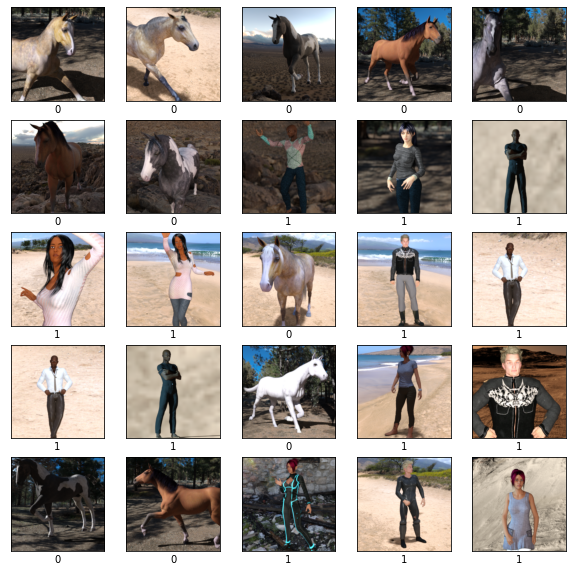

In [36]:
# Show the 1st 25 images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [37]:
# Initialize random number generator

sd = 1
#np.random.seed(sd) # Not used in this example
tf.random.set_seed(sd)


# Clear Keras global state

tf.keras.backend.clear_session()


In [27]:
print('Data Shape')
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)
print('')

print('View data')
print(x_train[0,:10,:10])
print('y_train[0]:', y_train[0])
print('y_train max:', y_train.max())


Data Shape
x_train.shape: (1027, 300, 300, 3)
y_train.shape: (1027,)
x_test.shape: (256, 300, 300, 3)
y_test.shape: (256,)

View data
[[[53 55 45]
  [46 47 40]
  [39 40 36]
  [31 33 29]
  [29 32 27]
  [30 33 26]
  [39 42 30]
  [57 58 39]
  [74 74 49]
  [67 67 44]]

 [[41 40 34]
  [49 48 42]
  [54 53 48]
  [40 41 37]
  [31 33 28]
  [30 33 26]
  [43 45 32]
  [62 64 42]
  [61 63 42]
  [52 54 38]]

 [[33 29 28]
  [50 47 42]
  [62 58 53]
  [44 43 39]
  [25 28 24]
  [27 30 24]
  [46 48 34]
  [64 66 44]
  [60 62 43]
  [54 56 43]]

 [[32 29 28]
  [45 43 39]
  [49 48 43]
  [33 33 30]
  [19 21 19]
  [28 31 24]
  [46 49 34]
  [56 58 40]
  [58 60 43]
  [59 61 49]]

 [[35 32 30]
  [52 51 44]
  [54 55 46]
  [35 37 32]
  [21 23 21]
  [27 30 24]
  [38 41 30]
  [40 44 32]
  [47 50 37]
  [51 53 41]]

 [[36 33 31]
  [61 61 49]
  [71 72 54]
  [55 56 42]
  [30 33 27]
  [20 24 20]
  [25 28 22]
  [31 35 26]
  [41 45 33]
  [42 45 34]]

 [[37 34 31]
  [66 66 51]
  [80 81 60]
  [68 68 51]
  [40 41 31]
  [24 26 

In [49]:
# Correcting features

x_train = x_train / 255.0
x_test = x_test / 255.0

In [50]:
cur_x_train = x_train[0]#[:,:,0]
cur_x_train

array([[[0.20784314, 0.21568627, 0.17647059],
        [0.18039216, 0.18431373, 0.15686275],
        [0.15294118, 0.15686275, 0.14117647],
        ...,
        [0.09411765, 0.09803922, 0.09411765],
        [0.08235294, 0.09019608, 0.08235294],
        [0.0745098 , 0.08235294, 0.07843137]],

       [[0.16078431, 0.15686275, 0.13333333],
        [0.19215686, 0.18823529, 0.16470588],
        [0.21176471, 0.20784314, 0.18823529],
        ...,
        [0.07058824, 0.07843137, 0.0745098 ],
        [0.0627451 , 0.07058824, 0.0627451 ],
        [0.0627451 , 0.07058824, 0.0627451 ]],

       [[0.12941176, 0.11372549, 0.10980392],
        [0.19607843, 0.18431373, 0.16470588],
        [0.24313725, 0.22745098, 0.20784314],
        ...,
        [0.06666667, 0.0745098 , 0.06666667],
        [0.05882353, 0.0627451 , 0.05490196],
        [0.05490196, 0.05882353, 0.05098039]],

       ...,

       [[0.62745098, 0.56078431, 0.49019608],
        [0.63529412, 0.57647059, 0.50588235],
        [0.55686275, 0

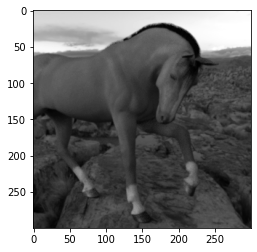

In [53]:
# Your solution code
RED_CONV_GRAY = 0.2989
GREEN_CONV_GRAY = 0.5870
BLUE_CONV_GRAY = 0.1140

#cur_x_train = x_train[:,:,0]

x_train_bw = []

for cur_x_train in x_train:

  red_gray_img = tf.math.scalar_mul(RED_CONV_GRAY,cur_x_train[:,:,0])
  green_gray_img = tf.math.scalar_mul(GREEN_CONV_GRAY,cur_x_train[:,:,1])
  blue_gray_img = tf.math.scalar_mul(BLUE_CONV_GRAY,cur_x_train[:,:,2])

  gray_img = tf.add(tf.add(red_gray_img, green_gray_img),blue_gray_img)

  plt.imshow(gray_img, cmap=plt.get_cmap('gray'))

  x_train_bw = x_train_bw + [gray_img]

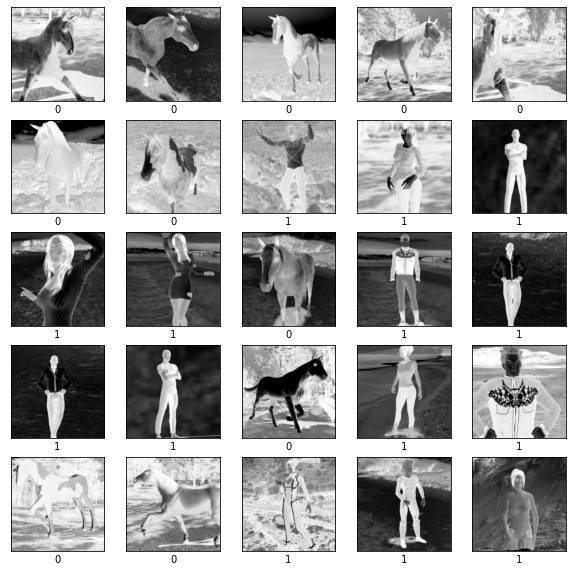

In [54]:
# Show the 1st 25 images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_bw[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [64]:
# Define neural network architecture

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(300, 300)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [65]:
# View model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 90000)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               11520128  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 11,520,386
Trainable params: 11,520,386
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Create the network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [67]:
# Model Training

model.fit(x_train, y_train, epochs=10)


Epoch 1/10


ValueError: ignored

---